#  Task 1: Time Series Analysis


- Description: Analyze and model time-series data to
forecast future values (e.g., stock prices, sales).


In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm
import torch

I have selected a time series dataset from the given datsets.

In [5]:
ts_dataset = pd.read_csv("2) Stock Prices Data Set.csv")
ts_dataset.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


We can use preprocessed dataset of this data. Which we have to make in our first session.


In [2]:
dataset = pd.read_csv(r"D:\codeveda_internship\Level 1 (Basic)\cleaned_scaled_stock_prices.csv")
dataset.head()

,symbol,date,open,high,low,close,volume
0,1,2014-01-02,-1.019921,-1.010001,-1.015134,-1.014292,8998943
1,3,2014-01-02,0.071231,0.060759,0.075483,0.063546,58791957
2,2,2014-01-02,0.693568,0.704232,0.692347,0.680648,542711
3,4,2014-01-02,-0.476483,-0.481947,-0.478746,-0.479576,4569061
4,5,2014-01-02,-0.115061,-0.125396,-0.114667,-0.119818,1148391


In [3]:
# extracting the features from data column
dataset['date'] = pd.to_datetime(dataset['date'])
dataset['year'] = dataset['date'].dt.year
dataset['month'] = dataset['date'].dt.month
dataset['day'] = dataset['date'].dt.day
dataset['Weekday'] = dataset['date'].dt.weekday
dataset.drop(columns=['date'], inplace=True)



In [4]:
dataset.head()

,symbol,open,high,low,close,volume,year,month,day,Weekday
0,1,-1.019921,-1.010001,-1.015134,-1.014292,8998943,2014,1,2,3
1,3,0.071231,0.060759,0.075483,0.063546,58791957,2014,1,2,3
2,2,0.693568,0.704232,0.692347,0.680648,542711,2014,1,2,3
3,4,-0.476483,-0.481947,-0.478746,-0.479576,4569061,2014,1,2,3
4,5,-0.115061,-0.125396,-0.114667,-0.119818,1148391,2014,1,2,3


In [5]:
# scalling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset[['volume',	'year',	'month',	'day',	'Weekday']] = scaler.fit_transform(dataset[['volume',	'year',	'month',	'day',	'Weekday']])
dataset.reset_index(drop=True, inplace=True)

In [8]:
dataset.head()

,symbol,open,high,low,close,volume,year,month,day,Weekday
0,1,-1.019921,-1.010001,-1.015134,-1.014292,0.014556,0.0,0.0,0.033333,0.75
1,3,0.071231,0.060759,0.075483,0.063546,0.095096,0.0,0.0,0.033333,0.75
2,2,0.693568,0.704232,0.692347,0.680648,0.000878,0.0,0.0,0.033333,0.75
3,4,-0.476483,-0.481947,-0.478746,-0.479576,0.007390,0.0,0.0,0.033333,0.75
4,5,-0.115061,-0.125396,-0.114667,-0.119818,0.001858,0.0,0.0,0.033333,0.75


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488266 entries, 0 to 488265
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   symbol   488266 non-null  int64  
 1   open     488266 non-null  float64
 2   high     488266 non-null  float64
 3   low      488266 non-null  float64
 4   close    488266 non-null  float64
 5   volume   488266 non-null  float64
 6   year     488266 non-null  float64
 7   month    488266 non-null  float64
 8   day      488266 non-null  float64
 9   Weekday  488266 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 37.3 MB


In [9]:
# splitting the dataset into train and test set
x = dataset.drop(columns=['volume'])
y = dataset['volume']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((390612, 9), (97654, 9), (390612,), (97654,))

In [10]:
import tensorflow
from  tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

seq_gen = TimeseriesGenerator(x, y, length=1000, batch_size=128)

# for i, (seq, target) in enumerate(seq_gen):
#     print(f"Sequence {i}:\n{seq}\nTarget: {target}")
seq_gen[0][0].shape, seq_gen[0][1].shape

((128, 1000, 9), (128,))

In [15]:
seq_gen[0][0].shape, seq_gen[0][1].shape

((128, 1000, 9), (128,))

In [12]:
# i am using keras for deep learning model
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.LSTM(64, activation='relu', return_sequences=True, input_shape=(seq_gen[0][0].shape[1], seq_gen[0][0].shape[2])),
    keras.layers.LSTM(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
    
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

d:\codeveda_internship\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1000, 64)       │        18,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,081 (211.25 KB)

 Trainable params: 54,081 (211.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(seq_gen, epochs=10, verbose=1)

- Plot and decompose the time series into trend,
seasonality, and residual components(left over).

Text(0.5, 1.0, 'close of stock 1')

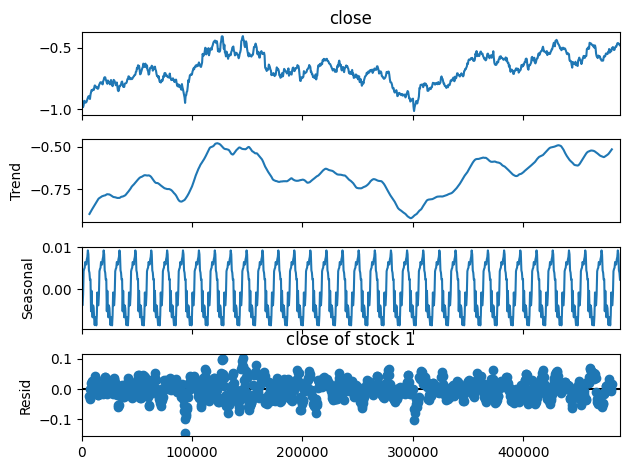

In [ ]:
# finding the seasonal component of top 5 stocks
from statsmodels.tsa.seasonal import seasonal_decompose
dataset_1 = dataset[dataset['symbol'] == 1]
decompose_1 = seasonal_decompose(dataset_1['close'], model='additive', period=30)
decompose_1.plot()
plt.title("close of stock 1")

Text(0.5, 1.0, 'close of stock 2')

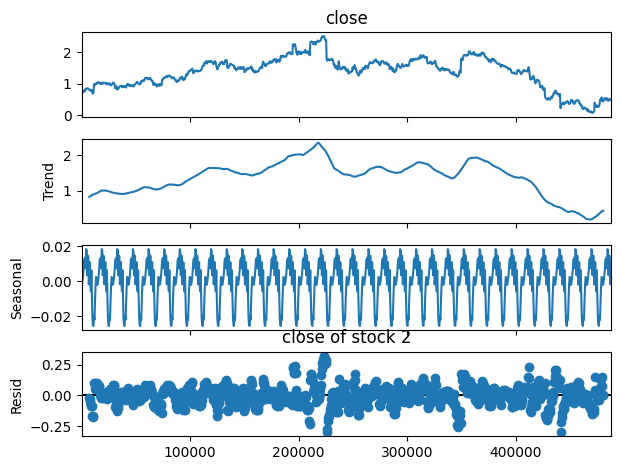

In [22]:
stock_2 = dataset[dataset['symbol'] == 2]
decompose_2 = seasonal_decompose(stock_2['close'], model='additive', period=30)
decompose_2.plot()
plt.title("close of stock 2")

Text(0.5, 1.0, 'close of stock 3')

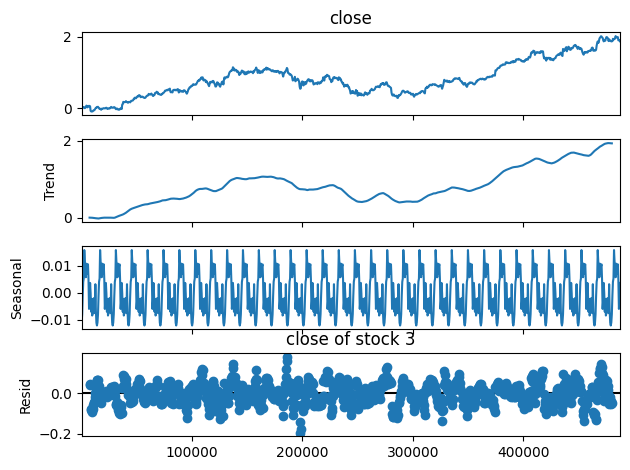

In [23]:
stock_3 = dataset[dataset['symbol'] == 3]
decompose_3 = seasonal_decompose(stock_3['close'], model='additive', period=30)
decompose_3.plot()
plt.title("close of stock 3")

Text(0.5, 1.0, 'close of stock 4')

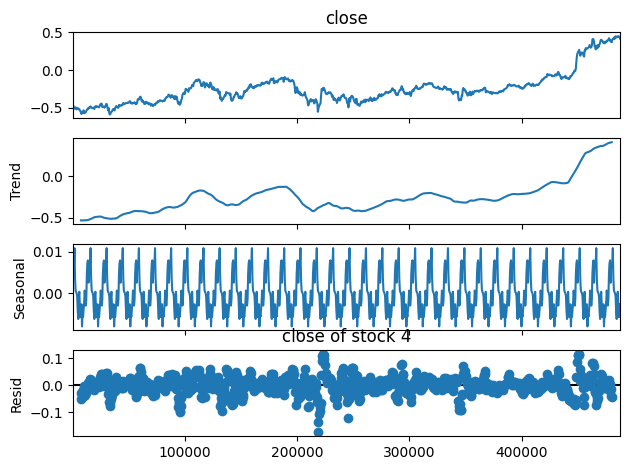

In [24]:
stock_4 = dataset[dataset['symbol'] == 4]
decompose_4 = seasonal_decompose(stock_4['close'], model='additive', period=30)
decompose_4.plot()
plt.title("close of stock 4")

Text(0.5, 1.0, 'close of stock 5')

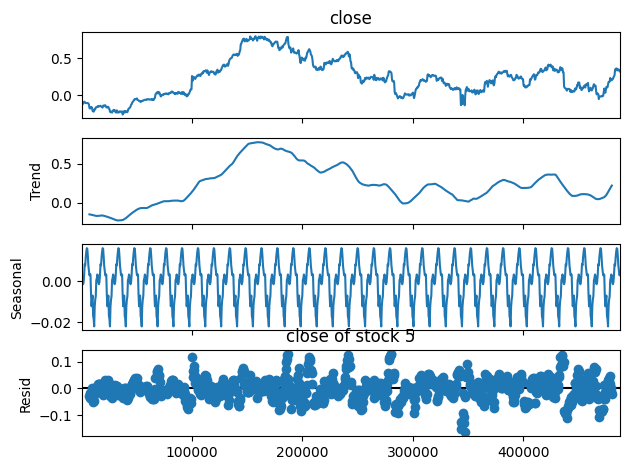

In [25]:
stock_5 = dataset[dataset['symbol'] == 5]
decompose_5 = seasonal_decompose(stock_5['close'], model='additive', period=30)
decompose_5.plot()
plt.title("close of stock 5")

- Implement moving average and exponential smoothing
techniques.

d:\codeveda_internship\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


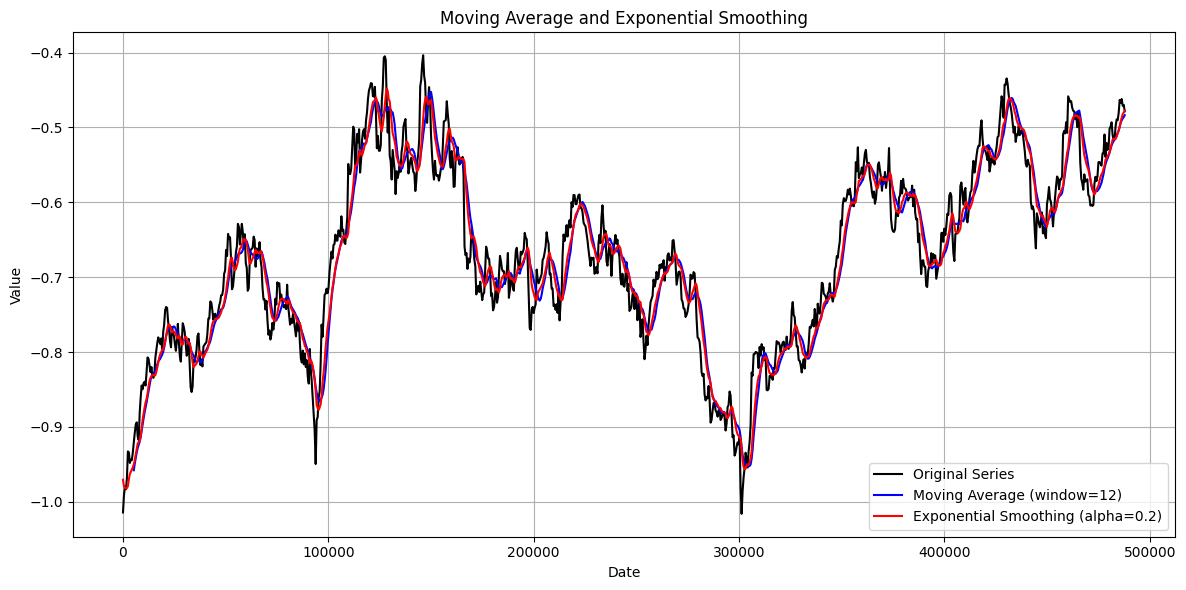

In [33]:
# moving average and exponential smoothing of stock 1
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

expo = SimpleExpSmoothing(dataset_1['close'], initialization_method="estimated")
fit = expo.fit(smoothing_level=0.2)
exp_smooth = fit.fittedvalues
moving_avg = dataset_1['close'].rolling(window=12).mean() # average of last 12 months
plt.figure(figsize=(12, 6))
plt.plot(dataset_1['close'], label='Original Series', color='black')
plt.plot(moving_avg, label='Moving Average (window=12)', color='blue')
plt.plot(exp_smooth, label='Exponential Smoothing (alpha=0.2)', color='red')
plt.title("Moving Average and Exponential Smoothing")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



d:\codeveda_internship\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


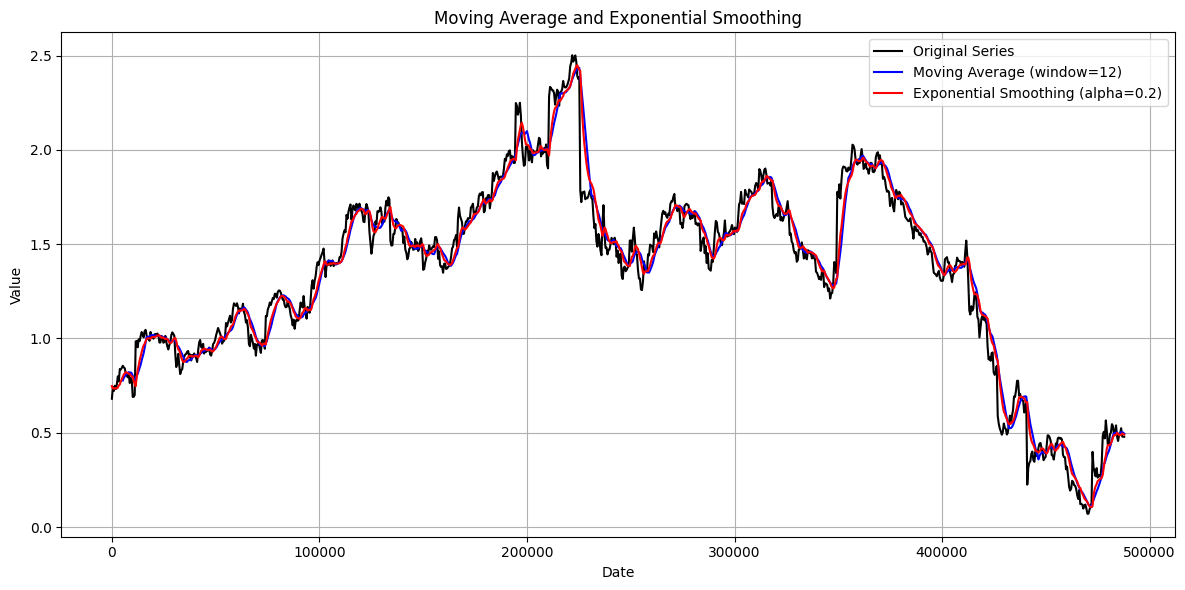

In [ ]:
# moving average and exponential smoothing of stock 2
expo_2  = SimpleExpSmoothing(stock_2['close'], initialization_method="estimated")
fit_2 = expo_2.fit(smoothing_level=0.2)
exp_smooth_2 = fit_2.fittedvalues
moving_avg_2 = stock_2['close'].rolling(window=12).mean() # Average of last 12 months
plt.figure(figsize=(12, 6))
plt.plot(stock_2['close'], label='Original Series', color='black')
plt.plot(moving_avg_2, label='Moving Average (window=12)', color='blue')
plt.plot(exp_smooth_2, label='Exponential Smoothing (alpha=0.2)', color='red')
plt.title("Moving Average and Exponential Smoothing")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

d:\codeveda_internship\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


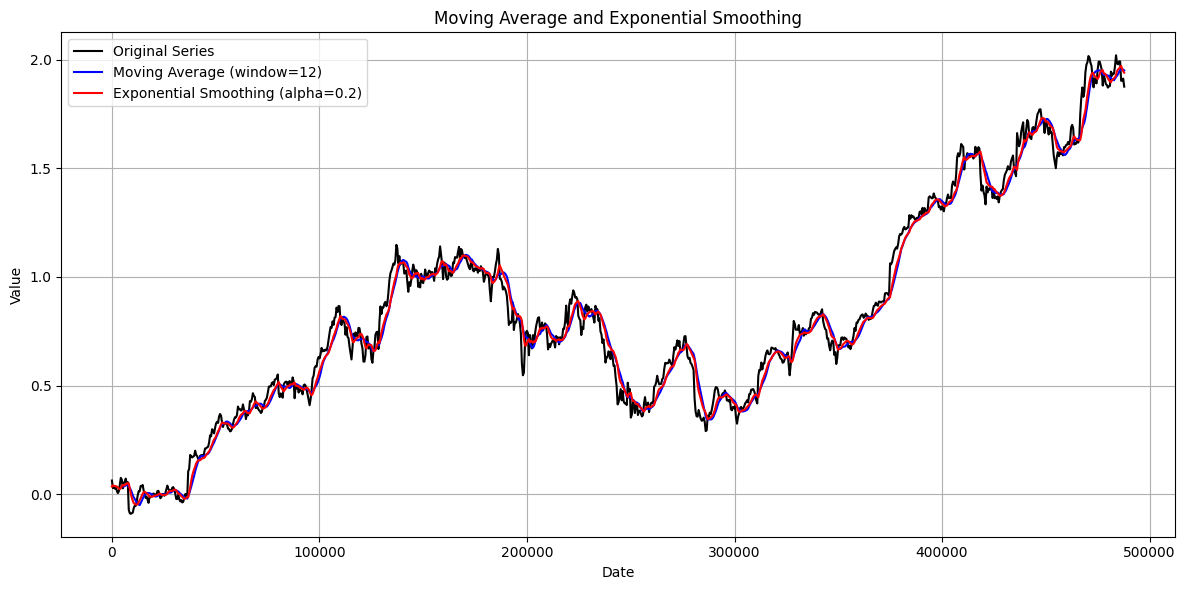

In [34]:
# moving average and exponential smoothing of stock 3
expo_3  = SimpleExpSmoothing(stock_3['close'], initialization_method="estimated")
fit_3 = expo_3.fit(smoothing_level=0.2)
exp_smooth_3 = fit_3.fittedvalues
moving_avg_3 = stock_3['close'].rolling(window=12).mean() # Average of last 12 months
plt.figure(figsize=(12, 6))
plt.plot(stock_3['close'], label='Original Series', color='black')
plt.plot(moving_avg_3, label='Moving Average (window=12)', color='blue')
plt.plot(exp_smooth_3, label='Exponential Smoothing (alpha=0.2)', color='red')
plt.title("Moving Average and Exponential Smoothing")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

d:\codeveda_internship\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


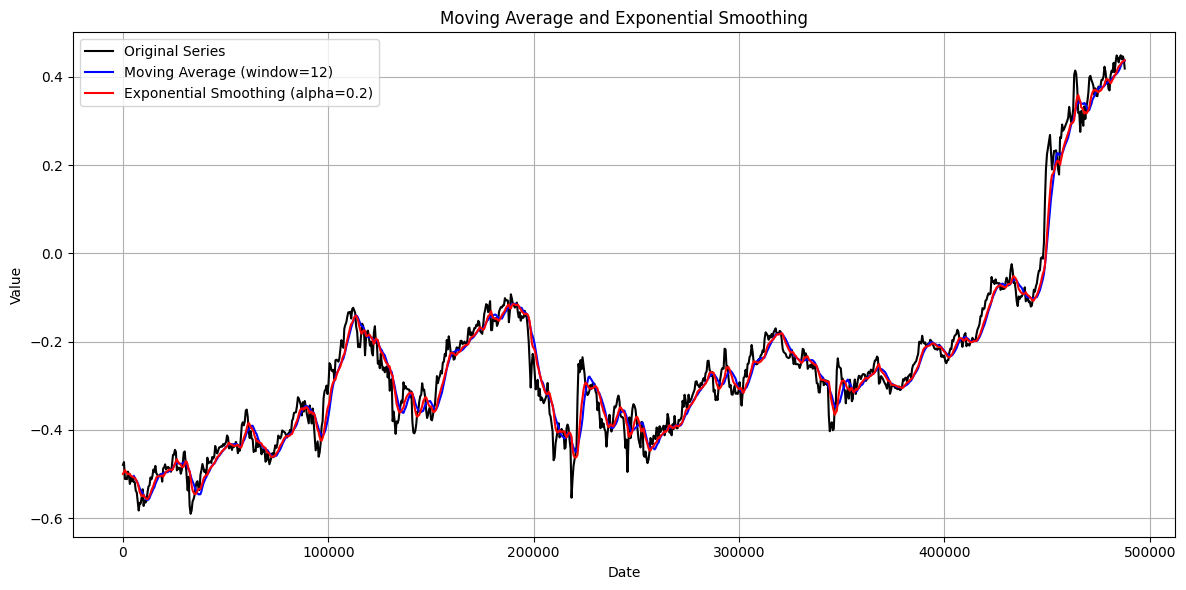

In [35]:
# moving average and exponential smoothing of stock 4
expo_4  = SimpleExpSmoothing(stock_4['close'], initialization_method="estimated")
fit_4 = expo_4.fit(smoothing_level=0.2)
exp_smooth_4 = fit_4.fittedvalues
moving_avg_4 = stock_4['close'].rolling(window=12).mean() # Average of last 12 months
plt.figure(figsize=(12, 6))
plt.plot(stock_4['close'], label='Original Series', color='black')
plt.plot(moving_avg_4, label='Moving Average (window=12)', color='blue')
plt.plot(exp_smooth_4, label='Exponential Smoothing (alpha=0.2)', color='red')
plt.title("Moving Average and Exponential Smoothing")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


d:\codeveda_internship\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


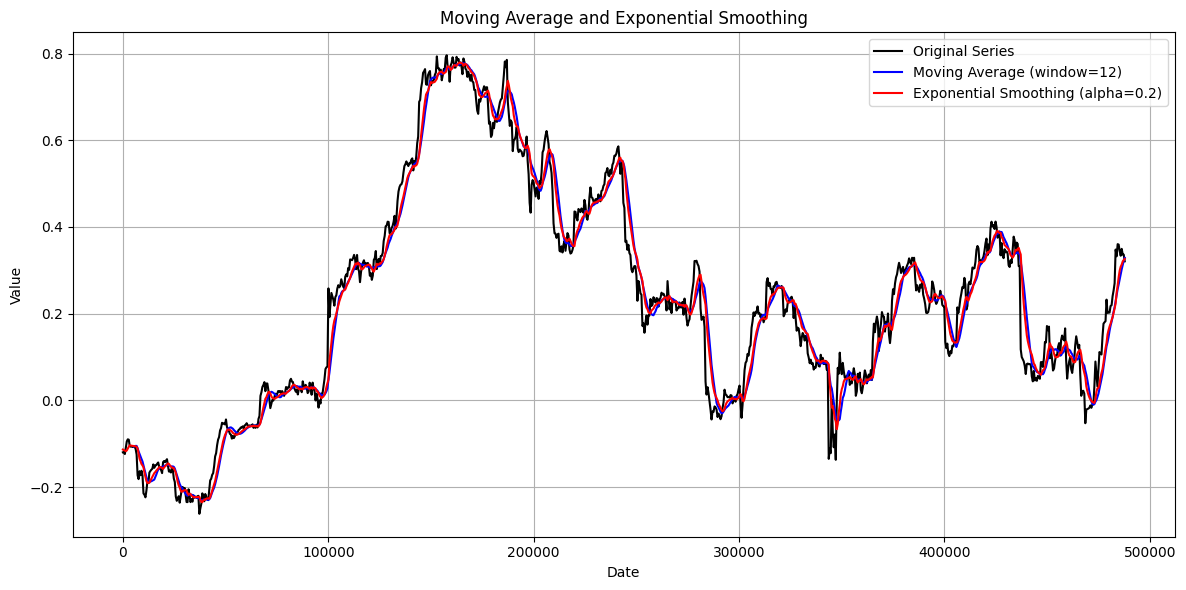

In [36]:
# moving average and exponential smoothing of stock 5
expo_5  = SimpleExpSmoothing(stock_5['close'], initialization_method="estimated")
fit_5 = expo_5.fit(smoothing_level=0.2)
exp_smooth_5 = fit_5.fittedvalues
moving_avg_5 = stock_5['close'].rolling(window=12).mean() # Average of last 12 months
plt.figure(figsize=(12, 6))
plt.plot(stock_5['close'], label='Original Series', color='black')
plt.plot(moving_avg_5, label='Moving Average (window=12)', color='blue')
plt.plot(exp_smooth_5, label='Exponential Smoothing (alpha=0.2)', color='red')
plt.title("Moving Average and Exponential Smoothing")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


- Build an ARIMA or SARIMA model for forecasting.

(Auto regressive integrated moving average)

(Seasonal auto regressive integrated moving average)

In [11]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [ ]:
arima = ARIMA(x['close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
arima_fit = arima.fit()


In [ ]:
sarimax= SARIMAX(x['close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarimax_fit = sarimax.fit()

This was the whole code of the Auto regressive Integrated moving average model and Season auto regeressive integrated moving average model. Due to my local system's hardware shortage (no GPU, or Small RAM) I cannot trained it and show the training progress. I Appologise it. 

- Evaluate the model using metrics such as RMSE and
visualize the forecast.

In [ ]:
from sklearn.metrics import mean_squared_error

forecast_steps = len(y)
forecast = arima_fit.forecast(steps=forecast_steps)

In [ ]:
# Evaluate the RMSE
rmse = np.sqrt(mean_squared_error(y, forecast))
print(f"RMSE: {rmse}")

In [ ]:
# Visualize the forecast
plt.figure(figsize=(12, 6))
plt.plot(x.index, x, label='Training Data')
plt.plot(y.index, y, label='Actual')
plt.plot(y.index, forecast, label='Forecast', linestyle='--')
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

- Tools: Python, pandas, statsmodels, matplotlib.